# SliceFinder Demo

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from slice_finder import SliceFinder

from ipywidgets import interact, interactive
from IPython.display import display

from bokeh.layouts import widgetbox, row
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models.widgets import DataTable, TableColumn  
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

Loading BokehJS ...

In [3]:
from SliceLogisticRegression import MyFakeLR

## Toy Example: UCI Census Data Set
For the demo, we use UCI Census data set and the classification task is to predict who makes above 50k a year.

In [4]:
adult_data = pd.read_csv('./data/adult_autostrat_current.csv')
#adult_autostrat = pd.read_csv('./../datasets/adult_autostrat_current.csv')
adult_data['workclass']=adult_data['workclass'].str.strip()
adult_data['education']=adult_data['education'].str.strip()
adult_data['marital_status']= adult_data['marital_status'].str.strip()
adult_data['occupation']= adult_data['occupation'].str.strip()
adult_data['relationship']= adult_data['relationship'].str.strip()
adult_data['race']= adult_data['race'].str.strip()
adult_data['sex']=adult_data['sex'].str.strip()
adult_data['native_country']=adult_data['native_country'].str.strip()
adult_data['age_bin']= adult_data['age_bin'].str.strip()
adult_data['education_num_bin']= adult_data['education_num_bin'].str.strip()
adult_data['hours_per_week_bin']= adult_data['hours_per_week_bin'].str.strip()
adult_data['capital_gain_bin']= adult_data['capital_gain_bin'].str.strip()
adult_data['capital_loss_bin']= adult_data['capital_loss_bin'].str.strip()



In [5]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   workclass           16281 non-null  object 
 1   education           16281 non-null  object 
 2   marital_status      16281 non-null  object 
 3   occupation          16281 non-null  object 
 4   relationship        16281 non-null  object 
 5   race                16281 non-null  object 
 6   sex                 16281 non-null  object 
 7   native_country      16281 non-null  object 
 8   age_bin             16281 non-null  object 
 9   education_num_bin   16281 non-null  object 
 10  hours_per_week_bin  16281 non-null  object 
 11  capital_gain_bin    16281 non-null  object 
 12  capital_loss_bin    16281 non-null  object 
 13  observed            16281 non-null  int64  
 14  expectation         16281 non-null  float64
dtypes: float64(1), int64(1), object(13)
memory usage: 1.9

#### Discretize continous columns to reduce the scanning search space

In [6]:

# adult_data.drop(columns="Education-Num", axis=1,inplace=True)
adult_data.head()
dff = adult_data.copy()

In [7]:
encoders = {}
for column in adult_data.columns:
    if adult_data.dtypes[column] == np.object or adult_data.dtypes[column] == "category":
        le = LabelEncoder()
        adult_data[column] = le.fit_transform(adult_data[column])
        encoders[column] = le
        print(column, le.classes_, le.transform(le.classes_))

X= adult_data[adult_data.columns[:-2]]
y = adult_data['observed']

pickle.dump(encoders, open("encoders.pkl", "wb"), protocol=2)

workclass ['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay'] [0 1 2 3 4 5 6 7 8]
education ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
marital_status ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed'] [0 1 2 3 4 5 6]
occupation ['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
relationship ['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife'] [0 1 2 3 4 5]
race ['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White'

In [8]:
X.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,age_bin,education_num_bin,hours_per_week_bin,capital_gain_bin,capital_loss_bin
0,4,1,4,7,3,2,1,38,0,0,1,0,0
1,4,11,2,5,0,4,1,38,2,3,2,0,0
2,2,7,2,11,0,4,1,38,1,2,1,0,0
3,4,15,2,7,0,2,1,38,2,1,1,7,0
4,0,15,4,0,3,4,0,38,0,1,0,0,0


In [9]:


# drop nan values
#adult_data = adult_data.dropna()


# Train a model
# lr = LogisticRegression()
# lr.fit(X, y)
model = MyFakeLR().getModel()
model.fit(X, y)


# lr = RandomForestClassifier(max_depth=5, n_estimators=10)
# lr.fit(X, y)

sf = SliceFinder(model, (X, y))
metrics_all = sf.evaluate_model((X,y))
reference = (np.mean(metrics_all), np.std(metrics_all), len(metrics_all))

## SliceFinder Recommendation Example

In [10]:
import json 
f = open('./adult_subsets.json')
mdss_subsets_data = json.load(f)
mdss_subsets_data[1][1]

50.1571608489248

In [11]:
#fake_slice_desc = {'gender':['Female']}

def mdss_dict_(fake_slice_desc:dict={}):
    desc_nv = {}
    
    for k in fake_slice_desc:
        
        myle = encoders[k]
        desc_v = []
        for v in fake_slice_desc[k]:
            result = np.where(myle.classes_ == v)
            desc_v.append(myle.transform(myle.classes_)[result[0]])
        desc_nv[k] = desc_v
    return desc_nv
#mdss_slice = mdss_dict_(fake_slice_desc)

In [12]:
from slice_finder import Slice
subset_effect_sizes = []
subset_scores = []
subset_size = []
subset_log_metric = []
subset_desc=[]
x = 0
for subset in mdss_subsets_data:
    #print('\n ===========subset desc =======================================================\n', subset, '\n==================================================================\n')
    sub_dict = subset[0]
    
    if subset[1] != 0:
        subset_desc.append(sub_dict)
        subset_scores.append(subset[1])
        to_choose = dff[sub_dict.keys()].isin(sub_dict).all(axis=1)
        temp_df = dff.loc[to_choose]
        size = len(temp_df)
        subset_size.append(size)
        #print(size)
        s = Slice(mdss_dict_(sub_dict), temp_df.index.values)
        get_effect_size = sf.eff_size_job(s, reference=reference)
        subset_effect_sizes.append(get_effect_size.effect_size)
        subset_log_metric.append(get_effect_size.metric)
        #print('\n === effect size : ', get_effect_size.effect_size, ' : =======\n')
    x = x + 1 

data = dict(
    subset_desc=subset_desc,
    subset_size=subset_size,
    subset_score=subset_scores,
    subset_effect_size=subset_effect_sizes,
    subset_metric = subset_log_metric

)

subset_slicefinder_table = pd.DataFrame(data)
subset_slicefinder_table

,subset_desc,subset_size,subset_score,subset_effect_size,subset_metric
0,"{'marital_status': ['Married-AF-spouse', 'Marr...",3363,1355.318552,0.876592,1.047617
1,"{'marital_status': ['Married-civ-spouse'], 'ca...",176,50.157161,1.479103,1.409628
2,"{'capital_gain_bin': ['15024-41310', '7298-797...",655,340.180599,1.628238,1.428633
3,"{'marital_status': ['Divorced', 'Married-civ-s...",30,5.100733,1.441808,1.403849
4,"{'occupation': ['Exec-managerial', 'Prof-speci...",154,7.496135,0.916493,1.183885
5,"{'occupation': ['?', 'Exec-managerial'], 'capi...",29,7.840252,0.738739,1.078781
6,"{'age_bin': ['28-36', '37-47', '48-90'], 'nati...",24,4.348138,1.127434,1.296280
7,"{'age_bin': ['37-47', '48-90'], 'education': [...",204,8.604870,0.960815,1.207118


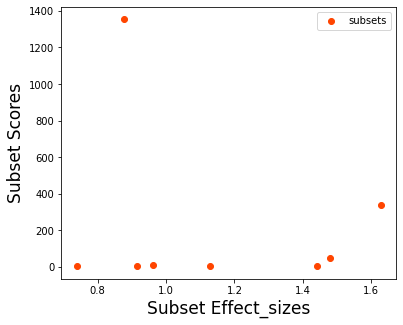

In [13]:
x_effect_size = pd.DataFrame(data=subset_effect_sizes, columns=["slize_sizes"])
y_subset_score = pd.DataFrame(data=subset_scores, columns=["slize_effects"])

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

plt.figure(1, figsize=(6,5))
ax = plt.subplot(1,1,1)

plt.scatter(x= x_effect_size,y=y_subset_score, label='subsets', c='orangered')
plt.legend()
plt.xlabel('Subset Effect_sizes', fontsize=17)
plt.ylabel('Subset Scores', fontsize=17)
plt.savefig('Slice_finder_Plots_for_Top_20_subsets.pdf')  
plt.show()

In [14]:
slice_effects = []
slice_sizes = []
slice_metrics = []

In [15]:

recommendations = sf.find_slice(k=5, epsilon=0.6, degree=5,max_workers=412, max_workers=4)

#creat a list for the slices
slices_to_mdss = []

for s in recommendations:
    #create a dictionary for each slice
    current_slice = {}
    temp_slice_dict = {}
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
        temp_v = values.replace(" ", "")
        temp_slice_dict[k] = [temp_v]
       
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    slice_effects.append(s.effect_size)
    current_slice["effect_size"] = s.effect_size
    print ('---------------------\nmetric: %s'%(s.metric))
    slice_metrics.append(s.metric)
    current_slice["slice_metric"] = s.metric
    print ('size: %s'%(s.size))
    slice_sizes.append(s.size)
    current_slice["slice_size"] = s.size
    current_slice["slice_dict"] = temp_slice_dict

    slices_to_mdss.append(current_slice)




degree 1
crossing
effect size filtering


Process SpawnProcess-1:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/concurrent/futures/process.py", line 237, in _process_worker
    call_item = call_queue.get(block=True)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/Users/winslowomondi/Documents/GitHub/Comparison_Subsets_canning/slicefinder/slice_finder.py", line 20, in <module>
    from slicefinder.risk_control  import *
ModuleNotFoundError: No module named 'slicefinder'
Process SpawnProcess-2:
Traceback (most recent call last):
  File "/Library/Frameworks/

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [ ]:
slices_to_mdss

[{'effect_size': 0.635056825432499,
  'slice_metric': 0.7913128119718242,
  'slice_size': 7403,
  'slice_dict': {'marital_status': ['Married-civ-spouse']}},
 {'effect_size': 0.8674037430341125,
  'slice_metric': 1.151868967878596,
  'slice_size': 258,
  'slice_dict': {'education': ['Prof-school']}},
 {'effect_size': 1.5663888669604826,
  'slice_metric': 1.4244851140617059,
  'slice_size': 254,
  'slice_dict': {'capital_gain_bin': ['7298-7978']}},
 {'effect_size': 1.6168575347910612,
  'slice_metric': 1.4318420898520898,
  'slice_size': 211,
  'slice_dict': {'capital_gain_bin': ['15024-41310']}},
 {'effect_size': 1.2375438057015116,
  'slice_metric': 1.3374138968393539,
  'slice_size': 189,
  'slice_dict': {'capital_loss_bin': ['1887-1974']}}]

In [ ]:
import json

slices_json = json.dumps(slices_to_mdss)

with open("slice.json", "w") as outfile:
    outfile.write(slices_json)

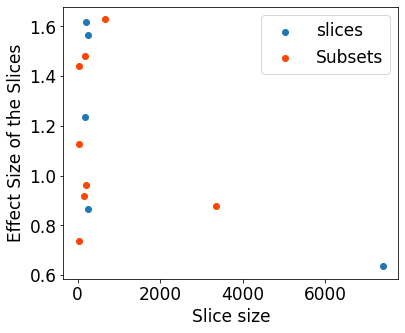

In [ ]:
x_size = pd.DataFrame(data=slice_sizes, columns=["slize_sizes"])
y_effect_size = pd.DataFrame(data=slice_effects, columns=["slize_effects"])

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

plt.figure(1, figsize=(6,5))
ax = plt.subplot(1,1,1)

plt.scatter(x= x_size,y=y_effect_size, label='slices')
plt.scatter(x= subset_slicefinder_table['subset_size'], y=subset_slicefinder_table['subset_effect_size'], c='orangered', label='Subsets')
plt.legend()
plt.xlabel('Slice size', fontsize=17)
plt.ylabel('Effect Size of the Slices', fontsize=17)
plt.savefig('Slice_finder_Plots_for_Top_20_slices.pdf')  
plt.show()

In [ ]:
slices = list()
with open('slices.p','rb') as handle:
    slices = pickle.load(handle)

pickle.dump(slices, open('slices_ver2.pkl','wb'), protocol=2)

encoders = dict()
# with open('encoder')

slices = list()
with open('slices_ver2.pkl','rb') as handle:
    slices = pickle.load(handle)
    
slices_ = sorted(slices, key=lambda s: s.size, reverse=True)    
k = 10    
for s in slices_[:k]:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))


Slice description:
marital_status:2 
---------------------
effect_size: 0.635056825432499
---------------------
metric: 0.7913128119718242
size: 7403

Slice description:
education:14 
---------------------
effect_size: 0.8674037430341125
---------------------
metric: 1.151868967878596
size: 258

Slice description:
capital_gain_bin:7 
---------------------
effect_size: 1.5663888669604826
---------------------
metric: 1.4244851140617059
size: 254

Slice description:
capital_gain_bin:2 
---------------------
effect_size: 1.6168575347910612
---------------------
metric: 1.4318420898520898
size: 211

Slice description:
capital_loss_bin:2 
---------------------
effect_size: 1.2375438057015116
---------------------
metric: 1.3374138968393539
size: 189

Slice description:
education:10 
---------------------
effect_size: 0.7476005655525081
---------------------
metric: 1.0798990587652662
size: 181

Slice description:
capital_gain_bin:8 
---------------------
effect_size: 1.530822313920776
----

## SliceFinder User Interface with Minimum Effect Size Slider

In [ ]:
slices, uninteresting = list(), list()
with open('slices.p','rb') as handle:
    slices = pickle.load(handle)
with open('uninteresting.p','rb') as handle:
    uninteresting = pickle.load(handle)  

def get_top_k_slices(candidates, min_effect_size):
    description_ = list()
    size_ = list()
    effect_size_ = list()
    metric_ = list()
    for s in candidates:
        if s.effect_size < min_effect_size:
            continue
            
        description = ''
        for k, v in list(s.filters.items()):
            values = ''
            if k in encoders:
                le = encoders[k]
                for v_ in v:
                    values += '%s '%(le.inverse_transform(v_)[0])
            else:
                for v_ in sorted(v, key=lambda x: x[0]):
                    if len(v_) > 1:
                        values += '%s ~ %s'%(v_[0], v_[1])
                    else:
                        values += '%s '%(v_[0])
            description += '%s:%s '%(k, values)
        description_.append(description)
        size_.append(s.size)
        effect_size_.append(s.effect_size)
        metric_.append(s.metric)
    return description_, size_, effect_size_, metric_

# load interesting slices
description_, size_, effect_size_, metric_ = get_top_k_slices(slices, 0)
    
# load uninteresting slices (candidates)
description_c, size_c, effect_size_c, metric_c = get_top_k_slices(uninteresting, 0)
    
data = dict(
        description=description_,
        size=size_,
        effect_size=effect_size_,
        metric=metric_,
    )
source = ColumnDataSource(data)

# scatter plot
hover = HoverTool(tooltips=[
    ("desc", "@description"),
    ("size", "@size"),
    ("effect_size", "@effect_size"),
    ("metric", "@metric"),
])
TOOLS = [hover]
p = figure(tools=TOOLS, plot_width=400, plot_height=400, 
           y_axis_label='Effect Size', x_axis_label='Size', title=None)
r = p.circle('size', 'effect_size', source=source)
#show(p, notebook_handle=True)

# data table
columns = [
        TableColumn(field="description", title="Description"),
        TableColumn(field="size", title="Size"),
        TableColumn(field="effect_size", title="Effect Size"),
        TableColumn(field="metric", title="Log Loss"),
    ]
t = DataTable(source=r.data_source, columns=columns, width=600, height=400)

show(row(p, t), notebook_handle=True)

def update(k=10, min_eff_size=0.4):
    desc_, size_, effect_size_, metric_ = get_top_k_slices(slices+uninteresting, min_eff_size)
    idx = sorted(range(len(size_)), key=lambda x: size_[x], reverse=True)
    r.data_source.data['description'] = np.array(desc_)[idx[:k]]
    r.data_source.data['size'] = np.array(size_)[idx[:k]]
    r.data_source.data['effect_size'] = np.array(effect_size_)[idx[:k]]
    r.data_source.data['metric'] = np.array(metric_)[idx[:k]]
    push_notebook()
    
w = interactive(update, k=(1,100), min_eff_size=(0, 1, 0.05))
display(w)

interactive(children=(IntSlider(value=10, description='k', min=1), FloatSlider(value=0.4, description='min_eff…

## Preliminary Results
Evaluate different baseline techniques as well as SliceFinder to see if they yield large problmatic slices.

In [ ]:
import copy
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from risk_control import effect_size
from decision_tree import DecisionTree

min_eff_size = 0.4
dataset = 'UCI'

sf = SliceFinder(lr, (X, y))
sf_recs = [s for s in slices+uninteresting if s.effect_size >= min_eff_size]
sf_recs = sorted(sf_recs, key=lambda x: x.size, reverse=True)

NameError: name 'lr' is not defined

In [ ]:
scaler = StandardScaler()
numeric_cols = ["Capital Gain", "Age", "fnlwgt", "Education-Num", "Capital Loss"]
X_ = copy.deepcopy(X)
X_[numeric_cols] = scaler.fit_transform(X_[numeric_cols])
reduced_data_train = PCA(n_components=2).fit_transform(X_)
reduced_data_test = PCA(n_components=2).fit_transform(X_)

In [ ]:
#change x.as_matrix() to x.to_numpy()
decisions = []
for x_, y_ in zip(X.to_numpy(), y.to_numpy()):
    y_p = lr.predict([x_])
    if y_p == y_:
        decisions.append(0)
    else:
        decisions.append(1)
dt = DecisionTree((X, y), lr)
dt = dt.fit(max_depth=6, min_size=100)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

plt.figure(1, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, np.array(sf_avg_sizes)/1000, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, np.array(cluster_avg_sizes)/1000, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/1000, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Size (k)', fontsize=17)
plt.savefig('%s_size_%s.pdf'%(dataset,min_eff_size))

plt.figure(2, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
plt.tight_layout()
plt.savefig('%s_effsize_%s.pdf'%(dataset,min_eff_size))
plt.show()

plt.figure(3, figsize=(12,5))
#plt.suptitle('Quality of recommended slices from UCI Census Data Set', y=1.02)
plt.subplot(1,2,1)
plt.plot(sf_k, np.array(sf_avg_sizes)/1000, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, np.array(cluster_avg_sizes)/1000, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/1000, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Size (k)', fontsize=17)
plt.subplot(1,2,2)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.tight_layout()
plt.show()


### Adjusting T

In [ ]:

k = 10

sf_k, sf_avg_sizes, sf_avg_eff_sizes = list(), list(), list()
cluster_k, cluster_avg_sizes, cluster_avg_eff_sizes = list(), list(), list()
tree_k, tree_avg_sizes, tree_avg_eff_sizes = list(), list(), list()

for min_eff_size in np.array(range(1,9))/10.:
    sf = SliceFinder(lr, (X, y))
    sf_recs = [s for s in slices+uninteresting if s.effect_size >= min_eff_size]
    sf_recs = sorted(sf_recs, key=lambda x: x.size, reverse=True)
    
    sf_recs_ = sf_recs[:k]
    if len(sf_recs_) == k:
        sf_k.append(min_eff_size)
        sf_avg_sizes.append(np.mean([s.size for s in sf_recs_]))
        sf_avg_eff_sizes.append(np.mean([s.effect_size for s in sf_recs_]))
    
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(reduced_data_train) # train with mis-classified data
    y_predicted = kmeans.predict(reduced_data_test) # classify all data
    sizes, eff_sizes = list(), list()
    for cluster_id in np.unique(kmeans.labels_):
        X_cluster = X[np.array(y_predicted) == cluster_id]
        y_cluster = y[np.array(y_predicted) == cluster_id]
        sizes.append(len(X_cluster))
        eff_sizes.append(effect_size(sf.evaluate_model((X_cluster, y_cluster)), reference))
    cluster_k.append(min_eff_size)
    cluster_avg_eff_sizes.append(np.mean(eff_sizes))
    cluster_avg_sizes.append(np.mean(sizes))
    
    dt_recs = dt.recommend_slices(k=k, min_effect_size=min_eff_size)
    if len(dt_recs) == k:
        tree_k.append(min_eff_size)
        tree_avg_sizes.append(np.mean([s.size for s in dt_recs]))
        tree_avg_eff_sizes.append(np.mean([s.eff_size for s in dt_recs]))



In [ ]:
plt.figure(1, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, np.array(sf_avg_sizes)/1000, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, np.array(cluster_avg_sizes)/1000, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/1000, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Size (thousands)', fontsize=17)
plt.savefig('%s_size_%s_2.pdf'%(dataset,min_eff_size))        
        
plt.figure(2, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
plt.tight_layout()
plt.savefig('%s_effsize_%s_2.pdf'%(dataset,min_eff_size))
plt.show()

plt.figure(3, figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(sf_k, np.array(sf_avg_sizes)/1000, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, np.array(cluster_avg_sizes)/1000, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/1000, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Size (thousands)', fontsize=17)
plt.subplot(1,2,1)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.savefig('%s_slider.pdf'%(dataset))
plt.tight_layout()
plt.show()



## Fraudulent Data

In [ ]:
import copy
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from risk_control import effect_size
from decision_tree import DecisionTree

#main_df=pd.read_csv("creditcard.csv")
main_df=pd.read_csv("data/creditcard.csv")
main_df.head()
feature_size = len(main_df.columns)
class_index = feature_size -1 

fraud_raw = main_df[main_df['Class'] == 1]
normal_raw = main_df[main_df['Class'] == 0]

# Undersample the normal transactions
percentage = len(fraud_raw)/float(len(normal_raw))
normal = normal_raw.sample(frac=percentage)
fraud = fraud_raw
cc_data = fraud.append(normal)

In [ ]:
#msk = np.random.rand(len(cc_data)) < 0.8
X, y = cc_data[cc_data.columns.difference(["Class"])], cc_data["Class"]
#X_train, y_train = X[msk], y[msk]
#X, y = X[~msk], y[~msk]

reg_model = RandomForestClassifier(criterion='entropy',n_estimators=100)
lr = reg_model.fit(X,y)

In [ ]:
sf = SliceFinder(lr, (X, y))
metrics_all = sf.evaluate_model((X,y))
reference = (np.mean(metrics_all), np.std(metrics_all), len(metrics_all))

In [ ]:
recommendations = sf.find_slice(k=30, epsilon=0.4, degree=5,max_workers=4)
encoders = {}
for s in recommendations:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))

In [ ]:
slices, uninteresting = list(), list()
with open('slices.p','rb') as handle:
    slices = pickle.load(handle)
with open('uninteresting.p','rb') as handle:
    uninteresting = pickle.load(handle)  
    
min_eff_size = 0.4
dataset = 'Fraud'

sf_recs = [s for s in slices+uninteresting if s.effect_size >= min_eff_size]
sf_recs = sorted(sf_recs, key=lambda x: x.size, reverse=True)

In [ ]:
filtered_slices, rejected = sf.filter_by_significance(slices, reference, 0.05)
print (len(filtered_slices), len(rejected))

In [ ]:
import copy
main_df=pd.read_csv("data/creditcard.csv")

In [ ]:
scaler = StandardScaler()
numeric_cols = list(main_df.columns[1:28])
X_ = copy.deepcopy(X)
X_[numeric_cols] = scaler.fit_transform(X_[numeric_cols])
reduced_data_train = PCA(n_components=2).fit_transform(X_)
reduced_data_test = PCA(n_components=2).fit_transform(X_)

In [ ]:
decisions = []
for x_, y_ in zip(X.as_matrix(), y.as_matrix()):
    y_p = lr.predict([x_])
    if y_p == y_:
        decisions.append(0)
    else:
        decisions.append(1)
dt = DecisionTree((X, y), lr)
dt = dt.fit(max_depth=20, min_size=10)

In [ ]:
sf_k, sf_avg_sizes, sf_avg_eff_sizes = list(), list(), list()
cluster_k, cluster_avg_sizes, cluster_avg_eff_sizes = list(), list(), list()
tree_k, tree_avg_sizes, tree_avg_eff_sizes = list(), list(), list()

for k in range(1, 11):
    sf_recs_ = sf_recs[:k]
    if len(sf_recs_) == k:
        sf_k.append(k)
        sf_avg_sizes.append(np.mean([s.size for s in sf_recs_]))
        sf_avg_eff_sizes.append(np.mean([s.effect_size for s in sf_recs_]))
    
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(reduced_data_train) # train with mis-classified data
    y_predicted = kmeans.predict(reduced_data_test) # classify all data
    sizes, eff_sizes = list(), list()
    for cluster_id in np.unique(kmeans.labels_):
        X_cluster = X[np.array(y_predicted) == cluster_id]
        y_cluster = y[np.array(y_predicted) == cluster_id]
        sizes.append(len(X_cluster))
        eff_sizes.append(effect_size(sf.evaluate_model((X_cluster, y_cluster)), reference))
    cluster_k.append(k)
    cluster_avg_eff_sizes.append(np.mean(eff_sizes))
    cluster_avg_sizes.append(np.mean(sizes))
    
    dt_recs = dt.recommend_slices(k=k, min_effect_size=min_eff_size)
    if len(dt_recs) == k:
        tree_k.append(k)
        tree_avg_sizes.append(np.mean([s.size for s in dt_recs]))
        tree_avg_eff_sizes.append(np.mean([s.eff_size for s in dt_recs]))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

plt.figure(1, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, np.array(sf_avg_sizes)/100, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, np.array(cluster_avg_sizes)/100, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/100, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Size (hundreds)', fontsize=17)
plt.savefig('%s_size%s.pdf'%(dataset,min_eff_size))

plt.figure(2, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
plt.tight_layout()
plt.savefig('%s_effsize_%s.pdf'%(dataset,min_eff_size))
plt.show()

plt.figure(3, figsize=(12,5))
#plt.suptitle('Quality of recommended slices from UCI Census Data Set', y=1.02)
plt.subplot(1,2,1)
plt.plot(sf_k, np.array(sf_avg_sizes)/100, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, np.array(cluster_avg_sizes)/100, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/100, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Size (hundreds)', fontsize=17)
plt.subplot(1,2,2)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.tight_layout()
plt.show()

In [ ]:

k = 10

sf_k, sf_avg_sizes, sf_avg_eff_sizes = list(), list(), list()
cluster_k, cluster_avg_sizes, cluster_avg_eff_sizes = list(), list(), list()
tree_k, tree_avg_sizes, tree_avg_eff_sizes = list(), list(), list()

for min_eff_size in np.array(range(1,9))/10.:
    sf = SliceFinder(lr, (X, y))
    sf_recs = [s for s in slices+uninteresting if s.effect_size >= min_eff_size]
    sf_recs = sorted(sf_recs, key=lambda x: x.size, reverse=True)
    
    sf_recs_ = sf_recs[:k]
    if len(sf_recs_) == k:
        sf_k.append(min_eff_size)
        sf_avg_sizes.append(np.mean([s.size for s in sf_recs_]))
        sf_avg_eff_sizes.append(np.mean([s.effect_size for s in sf_recs_]))
    
   
    dt_recs = dt.recommend_slices(k=k, min_effect_size=min_eff_size)
    if len(dt_recs) == k:
        tree_k.append(min_eff_size)
        tree_avg_sizes.append(np.mean([s.size for s in dt_recs]))
        tree_avg_eff_sizes.append(np.mean([s.eff_size for s in dt_recs]))





In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

plt.figure(3, figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(sf_k, np.array(sf_avg_sizes)/100, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, np.array(cluster_avg_sizes)/100, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/100, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Size (hundreds)', fontsize=17)
plt.subplot(1,2,1)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.savefig('%s_slider.pdf'%(dataset))
plt.tight_layout()
plt.show()

In [ ]:
### Top-3 slices for LS and DT

In [ ]:
#sf_recs = sorted(sf_recs, key=lambda x: x.size, reverse=True)
for s in sf_recs[:3]:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))
    
for s in dt_recs[:3]:
    print ('\n=====================\nSlice description:')
    print (s.__ancestry__())
    print (s.__str__())
    print ('---------------------\neffect_size: %s'%(s.eff_size))
    print ('size: %s'%(s.size))

# Simulation Study
Emphasize that we are not just accuracy-hungting (i.e., give me slices with lowest performance?? The challenge is automatically defining slices, because there are just so many ways to slice the data); to this end, show how the performance distributions change over differnet numbers of clusters--connect this to the original motiviation, where the overall perofrmance differs from smaller slice performances.

Comment: model accuracy distributions? What happens when we add two additional dimensions, like size and interpretability? We need an interactive tool to assist users to quickly browse through problematic data slices for model validation.

## Feature variance

In [ ]:
import seaborn as sns

In [ ]:
y_hat = lr.predict(X)
X_mis = X[y != y_hat]

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_mis.values), 
    columns=X.columns)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=X_scaled, palette="Set3")
plt.ylabel('Normalized Feature Value')
plt.xticks(rotation=45)

## Accuracy-hunting approach
If we simply look for data slices with the lowest performance metrics, then we might end up with 1) slices that are too small or 2) too complicated to summarize and manually interpret. This is aside from the fact that we want to avoid presenting a numerous number of data slices to the user; to this end, we propose both a metric to identify a problematic slice for model validation and efficient top-down data slicing strategies that bring user's attention to a handful of the most problematic slices.

In [ ]:
adult_data2 = pd.read_csv(
    "data/adult.data",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

# drop nan values
adult_data2 = adult_data2.dropna()
adult_mis = adult_data2[y!=y_hat]
#print(adult_mis.dtypes)
df_edu_sex = pd.crosstab(adult_mis['Education'],adult_mis['Sex'])

#mosaic(df_edu_sex.stack(), title='Education-Sex')
#plt.show()

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(8,6))
adult_data2.plot.scatter('Age','Hours per week', color='yellow', label='Correct', ax=axes[0][0])
adult_mis.plot.scatter('Age','Hours per week', color='red', label='Incorrect',ax=axes[0][0])

adult_data2.plot.scatter('Education-Num','Hours per week', color='yellow', label='Correct', ax=axes[0][1])
adult_mis.plot.scatter('Education-Num','Hours per week', color='red', label='Incorrect',ax=axes[0][1])

adult_data2.plot.scatter('Capital Gain','Capital Loss', color='yellow', label='Correct', ax=axes[1][0])
adult_mis.plot.scatter('Capital Gain','Capital Loss', color='red', label='Incorrect',ax=axes[1][0])
plt.tight_layout()

In [ ]:
df_edu_race = pd.crosstab(adult_mis['Education'], adult_mis['Race']).divide(
    pd.crosstab(adult_data2['Education'],adult_data2['Race']))
sns.heatmap(df_edu_race, vmin=0, vmax=1)

In [ ]:
df_edu_sex = pd.crosstab(adult_mis['Education'], adult_mis['Sex']).divide(
    pd.crosstab(adult_data2['Education'],adult_data2['Sex']))
sns.heatmap(df_edu_sex, vmin=0, vmax=1)
plt.savefig('heat_edu_sex.png', bbox_inches='tight')

In [ ]:
y_male = y[X['Sex']==1]
y_hat_male = lr.predict(X[X['Sex'] == 1])

adult_male = adult_data2[adult_data2['Sex'] == 'Male']
adult_male['Age'] = pd.cut(adult_male.Age, 10)
adult_male_edu_age = pd.crosstab(adult_male['Education'],adult_male['Age'])

adult_male_mis = adult_male[y_male != y_hat_male]
adult_male_mis_edu_age = pd.crosstab(adult_male_mis['Education'],adult_male_mis['Age'])

df_male_edu_age = adult_male_mis_edu_age.divide(adult_male_edu_age)
sns.heatmap(df_male_edu_age, vmin=0, vmax=1)
plt.savefig('heat_male_edu_age.png', bbox_inches='tight')

In [ ]:
y_female = y[X['Sex']==0]
y_hat_female = lr.predict(X[X['Sex'] == 0])

adult_female = adult_data2[adult_data2['Sex'] == 'Female']
adult_female['Age'] = pd.cut(adult_female.Age, 10)
adult_female_edu_age = pd.crosstab(adult_male['Education'],adult_male['Age'])

adult_female_mis = adult_female[y_female != y_hat_female]
adult_female_mis_edu_age = pd.crosstab(adult_female_mis['Education'],adult_female_mis['Age'])

df_female_edu_age = adult_female_mis_edu_age.divide(adult_female_edu_age)
sns.heatmap(df_female_edu_age, vmin=0, vmax=1)
plt.savefig('heat_female_edu_age.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(10,7),gridspec_kw={'width_ratios':[1,1,0.08]})
g1 = sns.heatmap(df_edu_sex, vmin=0, vmax=1, cbar=False, ax=axes[0])
g2 = sns.heatmap(df_male_edu_age, vmin=0, vmax=1, ax=axes[1], cbar_ax=axes[2])
g2.set_ylabel('')
g2.set_yticks([])
g2.set_title('Sex=Male')
#g3 = sns.heatmap(df_female_edu_age, vmin=0, vmax=1, ax=axes[2], cbar_ax=axes[3])
#g3.set_ylabel('')
#g3.set_yticks([])
#plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('heat_male_edu_age2.png', bbox_inches='tight')

In [ ]:
y_male = y[X['Sex']==1]
y_hat_male = lr.predict(X[X['Sex'] == 1])

adult_male = adult_data2[adult_data2['Sex'] == 'Male']
adult_male_edu_work = pd.crosstab(adult_male['Education'],adult_male['Workclass'])

adult_male_mis = adult_male[y_male != y_hat_male]
adult_male_mis_edu_work = pd.crosstab(adult_male_mis['Education'],adult_male_mis['Workclass'])

df_male_edu_work = adult_male_mis_edu_work.divide(adult_male_edu_work)
sns.heatmap(df_male_edu_work, vmin=0, vmax=1)
plt.savefig('heat_male_edu_work.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(10,7),gridspec_kw={'width_ratios':[1,1,0.08]})
g1 = sns.heatmap(df_edu_sex, vmin=0, vmax=1, cbar=False, ax=axes[0])
g2 = sns.heatmap(df_male_edu_work, vmin=0, vmax=1, ax=axes[1], cbar_ax=axes[2])
g2.set_ylabel('')
g2.set_yticks([])
g2.set_title('Sex=Male')
#g3 = sns.heatmap(df_female_edu_age, vmin=0, vmax=1, ax=axes[2], cbar_ax=axes[3])
#g3.set_ylabel('')
#g3.set_yticks([])
#plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('heat_male_edu_work2.png', bbox_inches='tight')

## Recall of Injected Ground Truth
Compare the effectiveness of different search strategies based on recall and the injected ground truth.

### Ground Truth Injection

In [ ]:
adult_data = pd.read_csv(
    "data/adult.data",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

# drop nan values
adult_data = adult_data.dropna()

# Encode categorical features
encoders = {}
for column in adult_data.columns:
    if adult_data.dtypes[column] == np.object:
        le = LabelEncoder()
        adult_data[column] = le.fit_transform(adult_data[column])
        encoders[column] = le

# Original dataset (X, y)
X, y = adult_data[adult_data.columns.difference(["Target"])], adult_data["Target"]

In [ ]:
unmarried_white = X[(X['Relationship']==4) & (X['Race']==4)]
unmarried_white_female = unmarried_white[unmarried_white['Sex']==0]
print('Original dataset size: %s'%len(X))
print('Unmarried white demographic size: %s'%len(unmarried_white))
print('Unmarried white female demographic size: %s'%len(unmarried_white_female))

# Corrupted labels
import copy
y_c = copy.copy(y)
y_c.loc[unmarried_white_female.index] = (y_c.loc[unmarried_white_female.index] + 1)%2

In [ ]:
# Train a model
lr_c = RandomForestClassifier(max_depth=5, n_estimators=10)
lr_c.fit(X, y_c)

In [ ]:
# Instantiate Slice Finder
sf = SliceFinder(lr_c, (X, y))
metrics_all = sf.evaluate_model((X,y))
reference = (np.mean(metrics_all), np.std(metrics_all), len(metrics_all))

## Multiple-Comparison Problem

In [ ]:
dataset = 'UCI'
encoders = {}

main_df = pd.read_csv("data/creditcard.csv")
main_df = main_df.dropna()
main_df.head()
feature_size = len(main_df.columns)
class_index = feature_size -1 

fraud_raw = main_df[main_df['Class'] == 1]
normal_raw = main_df[main_df['Class'] == 0]

# Undersample the normal transactions
percentage = len(fraud_raw)/float(len(normal_raw))
normal = normal_raw.sample(frac=percentage)
fraud = fraud_raw
cc_data = fraud.append(normal)

X, y = cc_data[cc_data.columns.difference(["Class"])], cc_data["Class"]

reg_model = RandomForestClassifier(criterion='entropy',n_estimators=100)
lr = reg_model.fit(X,y)

In [ ]:
sf = SliceFinder(lr, (X, y))
metrics_all = sf.evaluate_model((X,y))
reference = (np.mean(metrics_all), np.std(metrics_all), len(metrics_all))

In [ ]:
adult_data = pd.read_csv(
    "data/adult.data",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

# drop nan values
adult_data = adult_data.dropna()

# Encode categorical features
encoders = {}
for column in adult_data.columns:
    if adult_data.dtypes[column] == np.object:
        le = LabelEncoder()
        adult_data[column] = le.fit_transform(adult_data[column])
        encoders[column] = le
        print(column, le.classes_, le.transform(le.classes_))

X, y = adult_data[adult_data.columns.difference(["Target"])], adult_data["Target"]

# Train a model
#lr = LogisticRegression()
#lr.fit(X, y)
lr = RandomForestClassifier(max_depth=5, n_estimators=10)
lr.fit(X, y)

sf = SliceFinder(lr, (X, y))
metrics_all = sf.evaluate_model((X,y))
reference = (np.mean(metrics_all), np.std(metrics_all), len(metrics_all))

In [ ]:
recommendations = sf.find_slice(k=100, epsilon=0.4, degree=5,max_workers=4, risk_control=False)
slices, uninteresting = list(), list()

In [ ]:
# slice finder results before risk control
with open('slices.p','rb') as handle:
    slices = pickle.load(handle)
with open('uninteresting.p', 'rb') as handle:
    uninteresting = pickle.load(handle) 

print(len(slices))    
    
slices, rejected, bf_slices, bf_rejected, ai_slices, ai_rejected = sf.filter_by_significance(
    slices, reference, 0.1, max_workers=10)
print('\n============t-Testing:')
'''
for s in rejected:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))
'''
with open('accepted_%s.p'%dataset,'wb') as handle:
    pickle.dump(slices, handle)
with open('rejected_%s.p'%dataset, 'wb') as handle:
    pickle.dump(rejected, handle)
    
print('\n============Bon Ferroni:')
'''
for s in bf_rejected:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))
'''
with open('bf_accepted_%s.p'%dataset,'wb') as handle:
    pickle.dump(bf_slices, handle)
with open('bf_rejected_%s.p'%dataset, 'wb') as handle:
    pickle.dump(bf_rejected, handle)   
    
print('\n============Alpha-Investing:')
'''
for s in ai_rejected:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))
'''
with open('ai_accepted_%s.p'%dataset,'wb') as handle:
    pickle.dump(ai_slices, handle)
with open('ai_rejected_%s.p'%dataset, 'wb') as handle:
    pickle.dump(ai_rejected, handle) 


In [ ]:
#print (len(slices), len(rejected)) # fraud (1544, 4182), census (2530, 876)
#print (np.mean([s.size for s in slices]), np.mean([s.size for s in rejected])) # fraud (7.86, 8.36), census (44.19, 5.18)
#print (np.mean([s.effect_size for s in slices]), np.mean([s.effect_size for s in rejected])) # fraud (1.54, 0.60), census (1.28, 0.65)       

In [ ]:
print(len(rejected), len(slices))
print(len(bf_rejected), len(bf_slices))
print(len(ai_rejected), len(ai_slices))

dataset='fraud'
with open('accepted_%s.p'%dataset,'rb') as handle:
    slices = pickle.load(handle)
with open('rejected_%s.p'%dataset, 'rb') as handle:
    rejected = pickle.load(handle)
with open('bf_accepted_%s.p'%dataset,'rb') as handle:
    bf_slices = pickle.load(handle)
with open('bf_rejected_%s.p'%dataset, 'rb') as handle:
    bf_rejected = pickle.load(handle)
with open('ai_accepted_%s.p'%dataset,'rb') as handle:
    ai_slices = pickle.load(handle)
with open('ai_rejected_%s.p'%dataset, 'rb') as handle:
    ai_rejected = pickle.load(handle)

    
plt.figure(1, figsize=(6,5))
significant = [s.size for s in slices if s.size]
insignificant = [s.size for s in rejected if s.size]
bins = np.linspace(0, max(significant), 50)
plt.hist(significant, bins, alpha=0.5, label='Accepted')
plt.hist(insignificant, bins, alpha=0.5, label='Rejected')
plt.xlim([0,100])
plt.legend(loc='upper right')
plt.xlabel('Slice Size',fontsize=17)
plt.tight_layout()
#plt.savefig('figures/longtail_%s.pdf'%dataset)

plt.figure(2, figsize=(6,5))
significant = [s.size for s in slices if s.size]
bf_significant = [s.size for s in bf_slices if s.size]
ai_significant = [s.size for s in ai_slices if s.size]
#insignificant = [s.size for s in rejected if s.size]
bins = np.linspace(0, max(significant), 50)
bf_bins = np.linspace(0, max(bf_significant), 50)
ai_bins = np.linspace(0, max(ai_significant), 50)
plt.hist(significant, bins, alpha=0.5, label='t-Testing')
plt.hist(bf_significant, bf_bins, alpha=0.5, label='Bon Ferroni')
plt.hist(ai_significant, ai_bins, alpha=0.5, label='Alpha-Investing')
#plt.hist(insignificant, bins, alpha=0.5, label='Rejected')
plt.xlim([0,100])
plt.legend(loc='upper right')
plt.xlabel('Slice Size',fontsize=17)
plt.tight_layout()
#plt.savefig('figures/longtail_%s.pdf'%dataset)
